<a href="https://colab.research.google.com/github/AayushiJain05/machine_learning/blob/main/SPAM_confusion_matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   Unnamed: 0 label                                               text  \
0         605   ham  Subject: enron methanol ; meter # : 988291\r\n...   
1        2349   ham  Subject: hpl nom for january 9 , 2001\r\n( see...   
2        3624   ham  Subject: neon retreat\r\nho ho ho , we ' re ar...   
3        4685  spam  Subject: photoshop , windows , office . cheap ...   
4        2030   ham  Subject: re : indian springs\r\nthis deal is t...   

   label_num  
0          0  
1          0  
2          0  
3          1  
4          0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB
None

Accuracy: 0.9748711340206185

Classification Report:
        

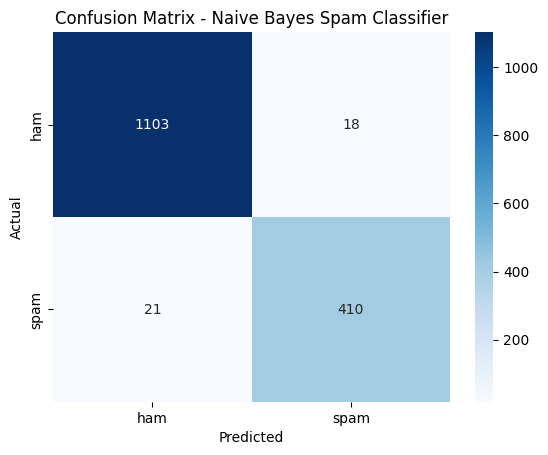

In [ ]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset (update the path if needed)
df = pd.read_csv("/content/spam_ham_dataset.csv")  # e.g., downloaded from Kaggle

# Inspect dataset
print(df.head())
print(df.info())

# --- Step 1: Prepare the data ---
# Some datasets have different column names — adjust as necessary
# Common columns: ['label', 'text'] or ['Category', 'Message']

# Example for the "spam_ham_dataset.csv" structure
# Columns: ['Unnamed: 0', 'label', 'text']
df = df[['label', 'text']]
df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})

# --- Step 2: Split the dataset ---
X_train, X_test, y_train, y_test = train_test_split(
    df['text'], df['label_num'], test_size=0.3, random_state=42
)

# --- Step 3: Convert text to numerical vectors ---
vectorizer = CountVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# --- Step 4: Train the Naive Bayes classifier ---
model = MultinomialNB()
model.fit(X_train_vec, y_train)

# --- Step 5: Make predictions ---
y_pred = model.predict(X_test_vec)

# --- Step 6: Evaluate performance ---
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['ham', 'spam']))

# --- Step 7: Confusion matrix visualization ---
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.title("Confusion Matrix - Naive Bayes Spam Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
